# Оптимизация параметров системы ижикевича с помощью машинного обучения


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.91182>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.7781705>


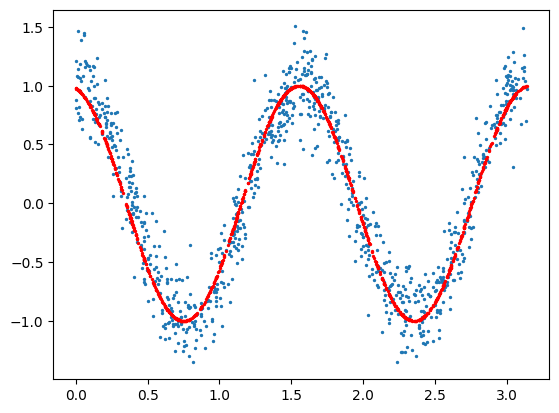

In [85]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
 
TOTAL_POINTS = 1000
 
x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=np.pi)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)
 
#k_true = 0.7
#b_true = 2.0
 
y = tf.cos(4*x) + noise 

plt.scatter(x, y, s=2)
w = tf.Variable(3.0)
b = tf.Variable(2.0)

f = tf.sin(w*x + b)
#print(f)
loss = tf.reduce_mean(tf.square(y - f))

EPOCHS = 200
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE  
learning_rate = 0.03
opt = tf.optimizers.SGD(learning_rate = 0.03)
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
    with tf.GradientTape() as t:
        f = tf.sin(w*x_batch + b)
        loss = tf.reduce_mean(tf.square(y_batch - f))
    dw, db = t.gradient(loss, [w, b])
    #w.assign_sub(learning_rate*dw)
    #b.assign_sub(learning_rate*db)
    opt.apply_gradients(zip([dw, db], [w, b]))
    
print(w, b, sep="\n")
y_pr = np.sin(w*x + b)

plt.scatter(x, y_pr, c='r', s=2)
plt.show()

tf.Tensor(630.44617, shape=(), dtype=float32)


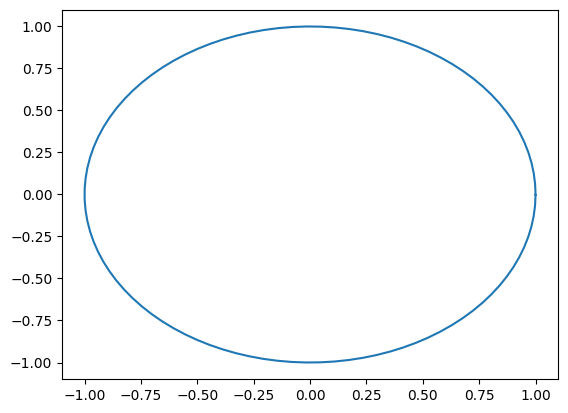

In [122]:
from scipy.integrate import odeint
import numpy as np

def dv(v, t):
    dx = -v[1]
    dy = v[0]
    return dx, dy  
t = np.linspace(0, 6.28, 100)
x0 = 1.0;
y0 = 0.0;
v = odeint(dv, [x0, y0], t)
plt.plot(v[:, 0], v[:, 1])

T = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=np.pi)
#print(T)

def dv(v, t):
    a = v[2]
    dx = -a*v[1]
    dy = v[0]
    return dx, dy, 1

a = tf.Variable(2.0)
f = lambda a: a*tf.sin(T)

with tf.GradientTape() as tt:
    f = a*tf.sin(T)
    #print(f)
    df = tt.gradient(f, a)
    print(df)

In [96]:
tf.Variable([1, 2, 3.0])

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>